Assignment Topic:
In this assignment, you will download the datasets provided, load them into a database, write and execute SQL queries to answer the problems provided, and upload a screenshot showing the correct SQL query and result for review by your peers. A Jupyter notebook is provided in the preceding lesson to help you with the process.

This assignment involves 3 datasets for the city of Chicago obtained from the Chicago Data Portal:

1. Chicago Socioeconomic Indicators

This dataset contains a selection of six socioeconomic indicators of public health significance and a hardship index, by Chicago community area, for the years 2008 – 2012.

2. Chicago Public Schools

This dataset shows all school level performance data used to create CPS School Report Cards for the 2011-2012 school year.

3. Chicago Crime Data

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days.

Instructions:
1. Review the datasets

Before you begin, you will need to become familiar with the datasets. Snapshots for the three datasets in .CSV format can be downloaded from the following links:

Chicago Socioeconomic Indicators: Click here

Chicago Public Schools: Click here

Chicago Crime Data: Click here

NOTE: Ensure you have downloaded the datasets using the links above instead of directly from the Chicago Data Portal. The versions linked here are subsets of the original datasets and have some of the column names modified to be more database friendly which will make it easier to complete this assignment. The CSV file provided above for the Chicago Crime Data is a very small subset of the full dataset available from the Chicago Data Portal. The original dataset is over 1.55GB in size and contains over 6.5 million rows. For the purposes of this assignment you will use a much smaller sample with only about 500 rows.

2. Load the datasets into a database

Perform this step using the LOAD tool in the Db2 console. You will need to create 3 tables in the database, one for each dataset, named as follows, and then load the respective .CSV file into the table:

CENSUS_DATA

CHICAGO_PUBLIC_SCHOOLS

CHICAGO_CRIME_DATA

To load the data into the tables the steps are similar to Week 2 Lab 1 Part II. The only difference with that lab is that in Step 5 of the instructions you will need to click on create (+) New Table and specify the name of the table you want to create and then click Next.



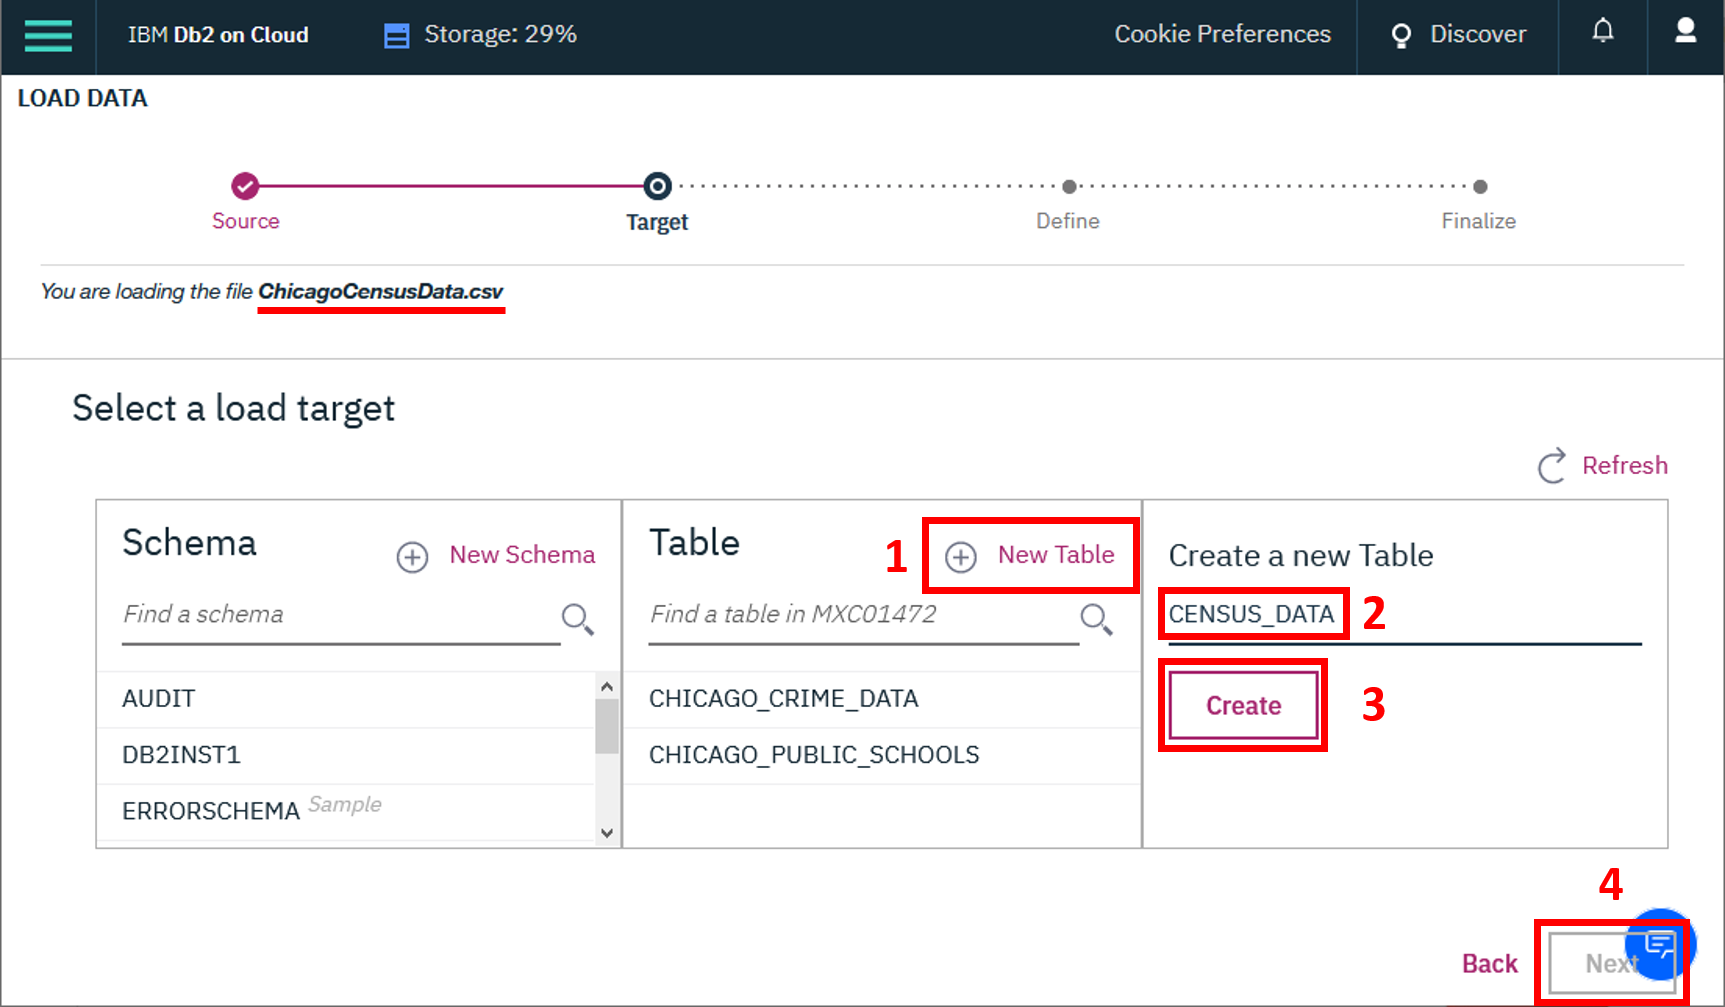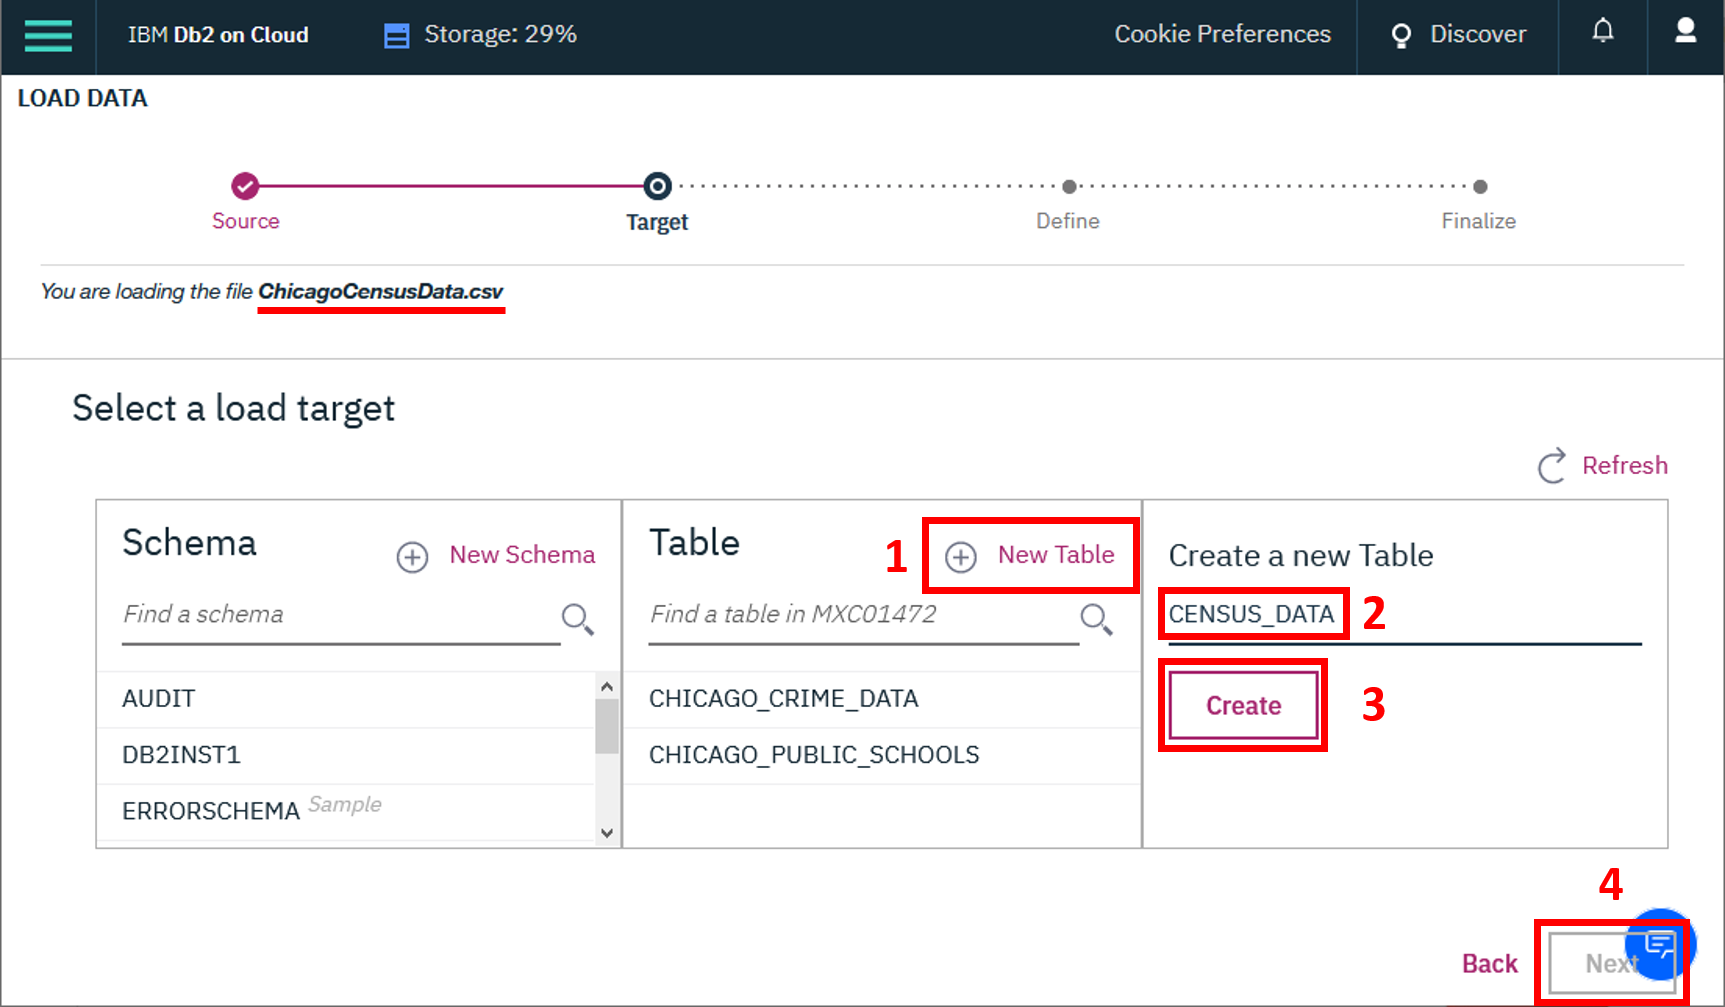

3. Write and execute queries

Perform this step in the Jupyter notebook provided in the previous section. Carefully read and understand each problem. Compose and execute the appropriate SQL queries to answer each of the problems. Take a screenshot of each query and its results and save it as a jpg file..

In [2]:
%load_ext sql

%sql ibm_db_sa://smg71626:n1teqCM62Gkm8Ptt@b1bc1829-6f45-4cd4-bef4-10cf081900bf.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32304/BLUDB?security=SSL

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: smg71626@BLUDB'

In [3]:
# query to retrieve list of all tables in the database for your db2 schema (username)
%sql select TABSCHEMA, TABNAME, CREATE_TIME from SYSCAT.TABLES where TABSCHEMA='SMG71626'

 * ibm_db_sa://smg71626:***@b1bc1829-6f45-4cd4-bef4-10cf081900bf.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32304/BLUDB
Done.


tabschema,tabname,create_time
SMG71626,CARSALESTABLE,2022-12-23 21:10:18.645457
SMG71626,PROVINCES,2023-01-23 17:41:35.954540
SMG71626,AUTHOR,2023-01-23 17:51:42.223130
SMG71626,PETSHOP,2023-01-23 21:11:39.902070
SMG71626,BOOKSHOP,2023-01-24 13:23:55.220261
SMG71626,BOOKSHOP_AUTHORDETAILS,2023-01-24 13:28:45.035875
SMG71626,STAFF_LOCATIONS,2023-02-02 00:27:43.257051
SMG71626,TEST,2023-02-27 12:41:33.260751
SMG71626,COUNTRY,2023-02-27 12:55:58.623184
SMG71626,PETSALE,2023-02-27 13:02:22.428502


Problem 1: Find the total number of crimes recorded in the CRIME table.

In [4]:
%sql select COUNT(*) AS TOTAL_CRIMES from CHICAGO_CRIME_DATA;

 * ibm_db_sa://smg71626:***@b1bc1829-6f45-4cd4-bef4-10cf081900bf.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32304/BLUDB
Done.


total_crimes
533


Problem 2: List community areas with per capita income less than 11000.

In [5]:
%sql select COMMUNITY_AREA_NAME from CHICAGO_SOCIOECONOMIC_DATA where PER_CAPITA_INCOME_ < 11000;

 * ibm_db_sa://smg71626:***@b1bc1829-6f45-4cd4-bef4-10cf081900bf.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32304/BLUDB
Done.


community_area_name
West Garfield Park
South Lawndale
Fuller Park
Riverdale


Problem 3: List all case numbers for crimes involving minors?



In [ ]:
%sql select CHICAGO_CRIME_DATA CRI, CENSUS_DATA

Problem 4: List all kidnapping crimes involving a child?(children are not considered minors for the purposes of crime analysis)



In [10]:
%sql select distinct(NAME), COLTYPE, LENGTH from SYSIBM.SYSCOLUMNS where TBNAME = 'CHICAGO_CRIME_DATA'

 * ibm_db_sa://smg71626:***@b1bc1829-6f45-4cd4-bef4-10cf081900bf.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32304/BLUDB
Done.


name,coltype,length
ARREST,VARCHAR,5
BEAT,SMALLINT,2
BLOCK,VARCHAR,35
CASE_NUMBER,VARCHAR,8
COMMUNITY_AREA_NUMBER,SMALLINT,2
DATE,DATE,4
DESCRIPTION,VARCHAR,46
DISTRICT,SMALLINT,2
DOMESTIC,VARCHAR,5
FBICODE,VARCHAR,3


Problem 5: What kind of crimes were recorded at schools?



Problem 6: List the average safety score for all types of schools.



Problem 7: List 5 community areas with highest % of households below poverty line.



Problem 8: Which community area(number) is most crime prone?



Problem 9: Use a sub-query to find the name of the community area with highest hardship index.



Problem 10: Use a sub-query to determine the Community Area Name with most number of crimes?

